In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 读取数据

In [2]:
# UCI数据：美国居民收入

# 显示数据设置：100列，400行
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows',400)
pd.set_option('display.width',1000)

In [198]:
# 读取数据
data=pd.DataFrame(pd.read_csv('/Users/miya/PycharmProjects/miya/Dataset/american_outcome.txt')).head(10000)

## 数据处理

In [199]:
# LabelEncoder标签数值化（将文字信息转化为数字信息）
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [200]:
# # OneHotEncoder 编码
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categorical_features=np.array([1,3,5,6,7,8,9,13]))    #数字代表需要编码的列，对应上面的LabelEncoder处理

In [201]:
data['workclass']=le.fit_transform(data['workclass'].values)
b=OneHotEncoder(sparse=False).fit_transform(data['workclass'].values.reshape(-1,1))
print(b)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [202]:
data['education']=le.fit_transform(data['education'].values)
data['education']=OneHotEncoder(sparse=False).fit_transform(data['education'].values.reshape(-1,1))
a=pd.get_dummies(data['education'],columns=data['education'])

In [203]:
data['marital-status']=le.fit_transform(data['marital-status'].values)
data['marital-status']=OneHotEncoder(sparse=False).fit_transform(data['marital-status'].values.reshape(-1,1))

In [204]:
data['occupation']=le.fit_transform(data['occupation'].values)
data['occupation']=OneHotEncoder(sparse=False).fit_transform(data['occupation'].values.reshape(-1,1))

In [205]:
data['relationship']=le.fit_transform(data['relationship'].values)
data['relationship']=OneHotEncoder(sparse=False).fit_transform(data['relationship'].values.reshape(-1,1))

In [206]:
data['race']=le.fit_transform(data['race'].values)
data['race']=OneHotEncoder(sparse=False).fit_transform(data['race'].values.reshape(-1,1))

In [207]:
data['sex']=le.fit_transform(data['sex'].values)
data['sex']=OneHotEncoder(sparse=False).fit_transform(data['sex'].values.reshape(-1,1))

In [208]:
data['native-country']=le.fit_transform(data['native-country'].values)
data['native-country']=OneHotEncoder(sparse=False).fit_transform(data['native-country'].values.reshape(-1,1))

In [209]:
data['50K']=le.fit_transform(data['50K'].values)
data['50K']=OneHotEncoder(sparse=False).fit_transform(data['50K'].values.reshape(-1,1))

In [210]:
# print(data['50K'])
# print(data['sex'])
# print(data['workclass'])
# print(data['education'])
# print(data)

In [211]:
# 数据去重，找出重复的位置
def duplicated(data):
    dIndex = data.duplicated()
    print(dIndex)
    data = data.drop_duplicates()
duplicated(data)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [212]:
# 填充连续型变量缺失值，以均值替代
data[['age','fnlwg','capital-gain', 'capital-loss', 'hours-per-week']]=data[['age','fnlwg','capital-gain', 'capital-loss', 'hours-per-week']].replace('?',np.NaN)
data.fillna(data.mean(),inplace=True)
# print(data)

In [178]:
# spearman相关系数分析（显示特征之间的关系）
def spearman(data):
    print(data.corr(method='spearman'))
    import matplotlib.style as psl   #图片风格
    print(psl.available)
    psl.use('dark_background')

In [179]:
spearman(data)

                     age  workclass     fnlwg  education  education-num  marital-status  occupation  relationship      race       sex  capital-gain  capital-loss  hours-per-week  native-country       50K
age             1.000000   0.069757 -0.071893  -0.040702       0.048631        0.152949   -0.017091      0.343119 -0.013115 -0.090972      0.113787      0.057391        0.134141        0.010279 -0.269649
workclass       0.069757   1.000000 -0.021314   0.007175       0.044333       -0.028570   -0.499220      0.134151 -0.021189 -0.119193      0.037938      0.007908        0.133258        0.000678 -0.077375
fnlwg          -0.071893  -0.021314  1.000000  -0.039769      -0.040799       -0.024060   -0.003114     -0.023758 -0.065649 -0.031444     -0.013233     -0.003726       -0.019536       -0.000120  0.014817
education      -0.040702   0.007175 -0.039769   1.000000       0.207826        0.016703    0.003551     -0.021029 -0.002847  0.036037      0.001442      0.009139        0.002686       

In [90]:
# 资产评估,通过两列值相减，并赋值，capital-gain和capital-loos之间的差值，来衡量资产状况，不再考虑capital-loss
data['capital-gain']=data['capital-gain']-data['capital-loss']
# print(data['capital-gain'])
# data=data.drop('capital-loss')

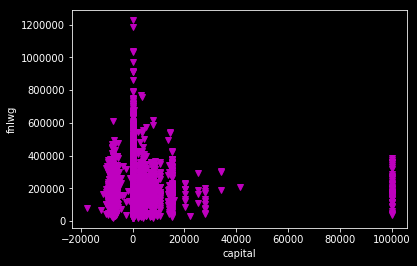

In [99]:
# 显示资产正负图（注意小于0的部分）
def capitalshow(data):
    y=data['fnlwg']
    plt.plot(data['capital-gain'],y,'mv',label='capital' )
    plt.ylabel("fnlwg")
    plt.xlabel("capital")
    plt.show()
capitalshow(data)

In [32]:
# 显示某一列的数据统计信息
def columshow(data):
    print(data['age'].value_counts())
# columshow(data)

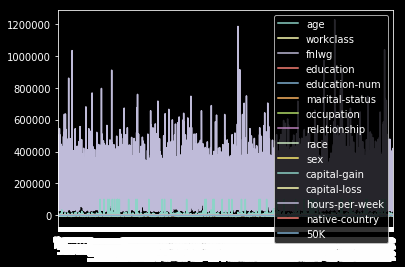

In [33]:
# 显示所有列的数据图
def allcolumshow(data):
    data.plot()
    data['age'].plot(kind='bar')
    plt.show()
allcolumshow(data)

In [34]:
# 全部特征箱形图
def boxshow(data):
    plt.boxplot(x=data.values,whis=1.5)
    plt.show()
    data.head()
    print(data.head())
    
    
# 部分特征箱形图
def subboxshow(features):
    plt.boxplot(x=data[features].values,labels=[features],whis=1.5)
    # plt.boxplot(x=data['age'].values,labels=['age'],whis=1.5)
    plt.show()
    data.head()
    print(data.head())

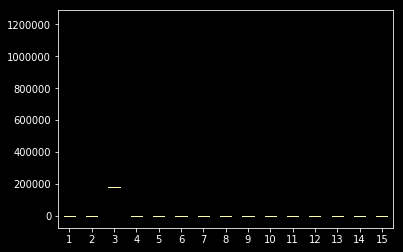

   age  workclass   fnlwg  education  education-num  marital-status  occupation  relationship  race  sex  capital-gain  capital-loss  hours-per-week  native-country  50K
0   39          7   77516          9             13               4           1             1     4    1          2174             0              40              38    0
1   50          6   83311          9             13               2           4             0     4    1             0             0              13              38    0
2   38          4  215646         11              9               0           6             1     4    1             0             0              40              38    0
3   53          4  234721          1              7               2           6             0     2    1             0             0              40              38    0
4   28          4  338409          9             13               2          10             5     2    0             0             0              40  

In [36]:
boxshow(data)
# subboxshow(features)

In [213]:
# 处理异常值
def errovalues(data):
    print(len(data[data['hours-per-week']>53]))    # 按条件筛选出对应值
    print(len(data[data['hours-per-week']<31]))
    # 异常值处理、绘制散点图
    data = data.T    #转置
    y = data.values[2]
    x = data.values[13]
    plt.plot(x,y,'o')
    plt.ylabel("fnlwg")
    plt.xlabel("hours-per-week")
    plt.show()

1091
1600


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


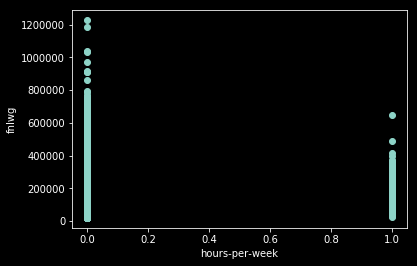

In [214]:
errovalues(data)

In [215]:
# 训练集数据标准化
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)
scaler.transform(data)

array([[ 0.0403028 ,  2.13819896, -1.0647719 , ..., -0.04319606,
        -0.13577058,  0.55871617],
       [ 0.84930066,  1.4548063 , -1.0102457 , ..., -2.24250516,
        -0.13577058,  0.55871617],
       [-0.03324246,  0.08802097,  0.23491808, ..., -0.04319606,
        -0.13577058,  0.55871617],
       ...,
       [-1.28351187,  0.08802097,  1.20892813, ..., -0.04319606,
        -0.13577058,  0.55871617],
       [-0.10678772,  0.08802097, -0.60158622, ...,  1.01573054,
        -0.13577058,  0.55871617],
       [ 0.0403028 ,  0.08802097,  1.04337361, ..., -0.04319606,
        -0.13577058,  0.55871617]])

In [40]:
# 观察特征之间的关系（主要是线性关系）
# x=data[['age','workclass','fnlwg','education','education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'native-country']]
x=data[['age','workclass','fnlwg','education','education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',  'native-country']]
def featuresrelationship(data):
    y = data['fnlwg']
    temp = ['age', 'workclass', 'fnlwg', 'education', 'education-num', 'marital-status', 'occupation', 'relationship','race', 'sex', 'capital-gain', 'native-country']
    from itertools import cycle  ##python自带的迭代器模块
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for i, col in zip(temp, colors):
        plt.plot(data[i], y, 'mv', markerfacecolor=col, markeredgecolor='k', label=i)
        # plt.plot(data['age'], y, 'mv', label='age')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

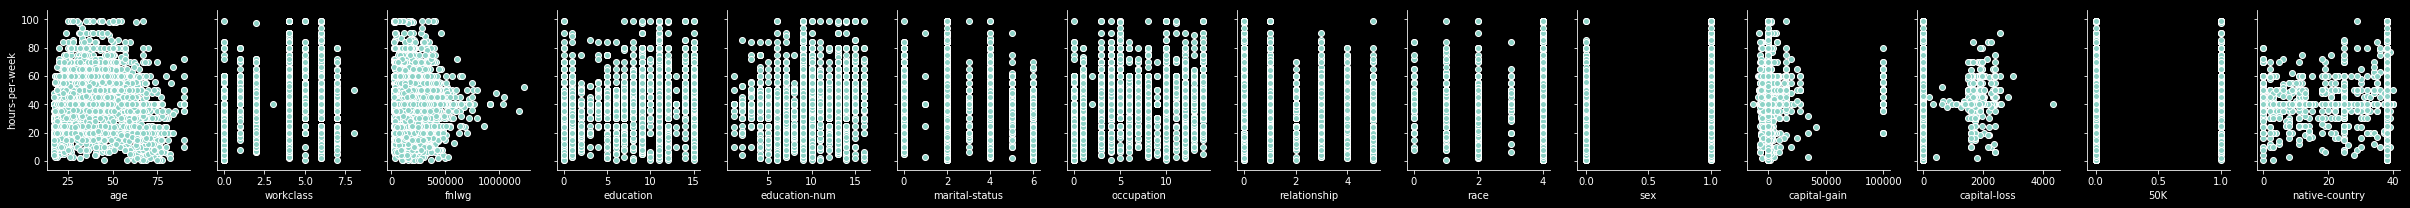

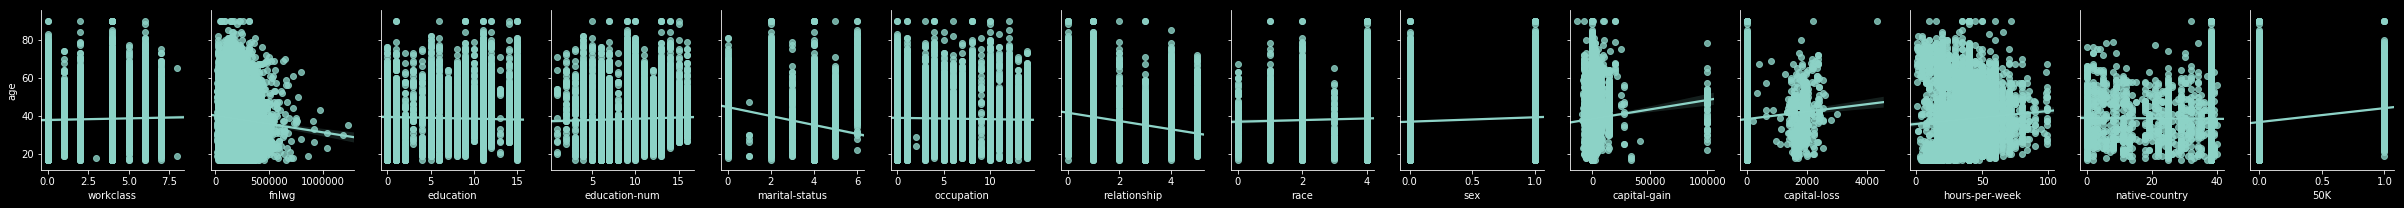

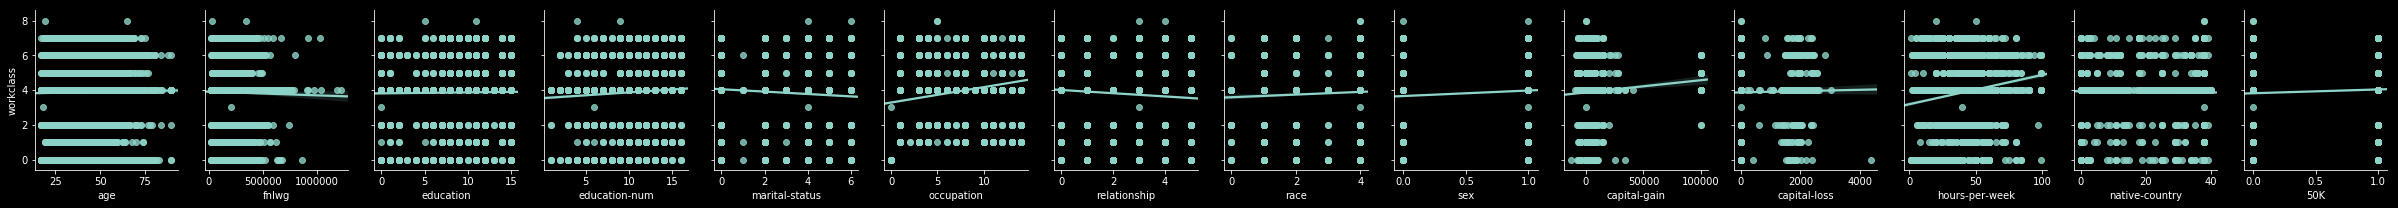

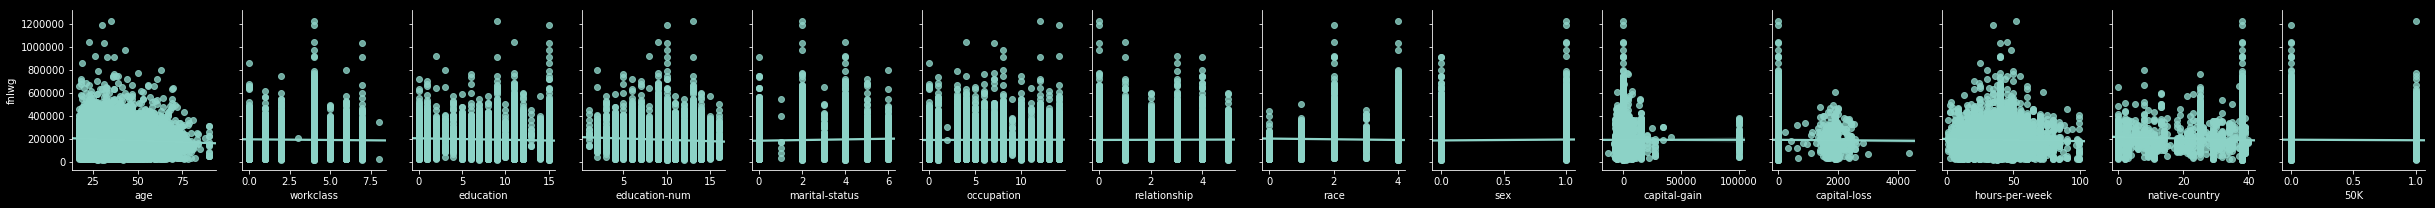

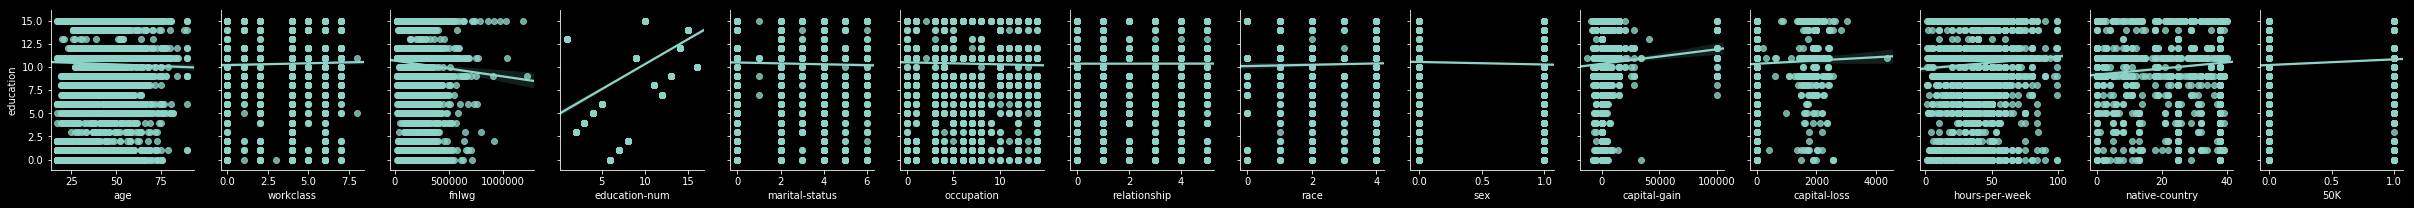

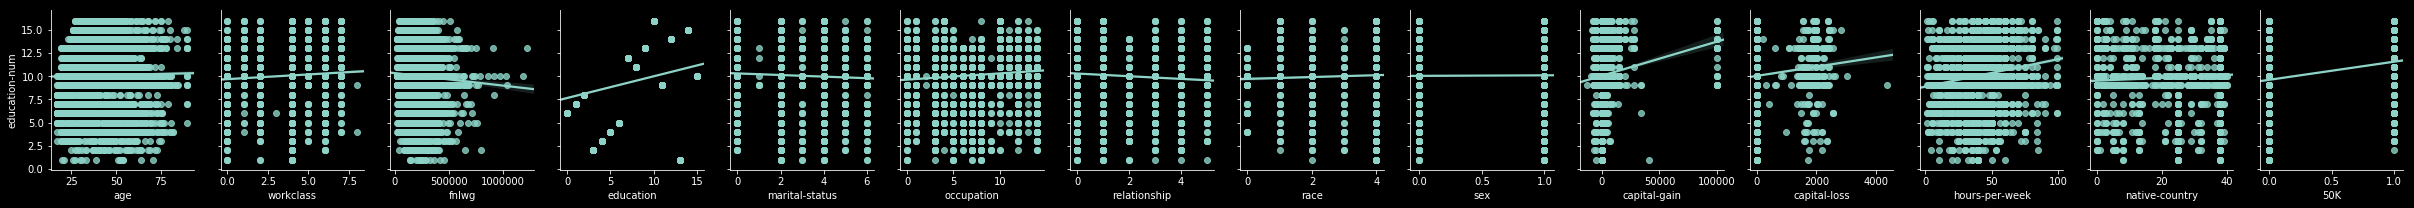

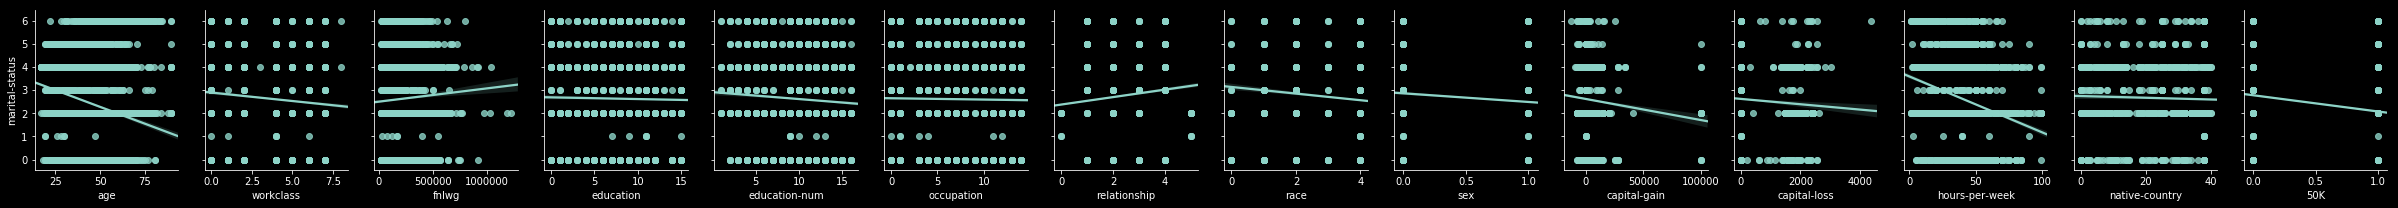

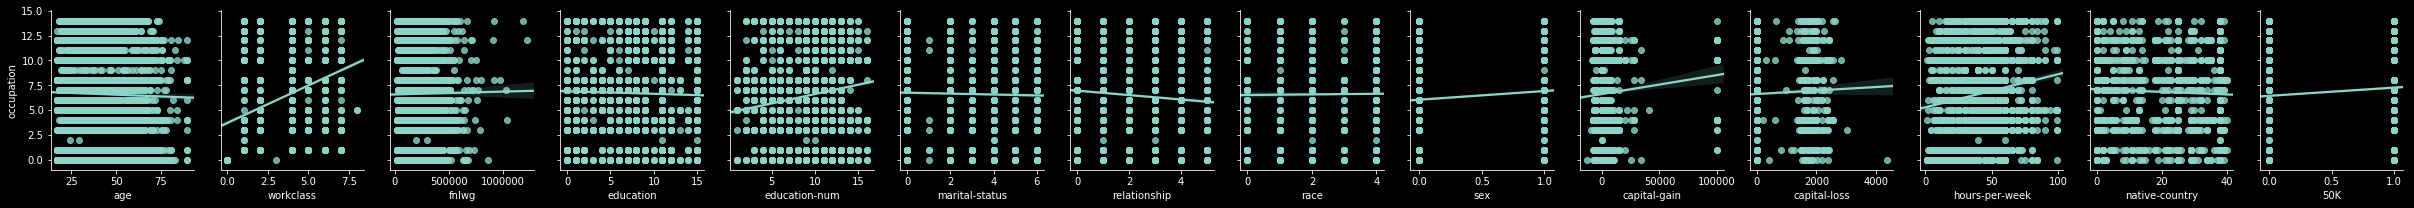

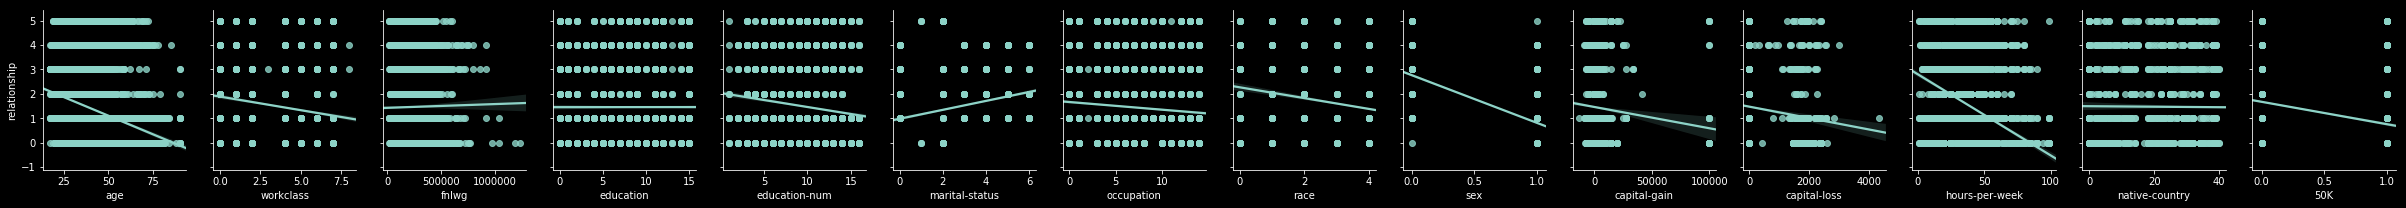

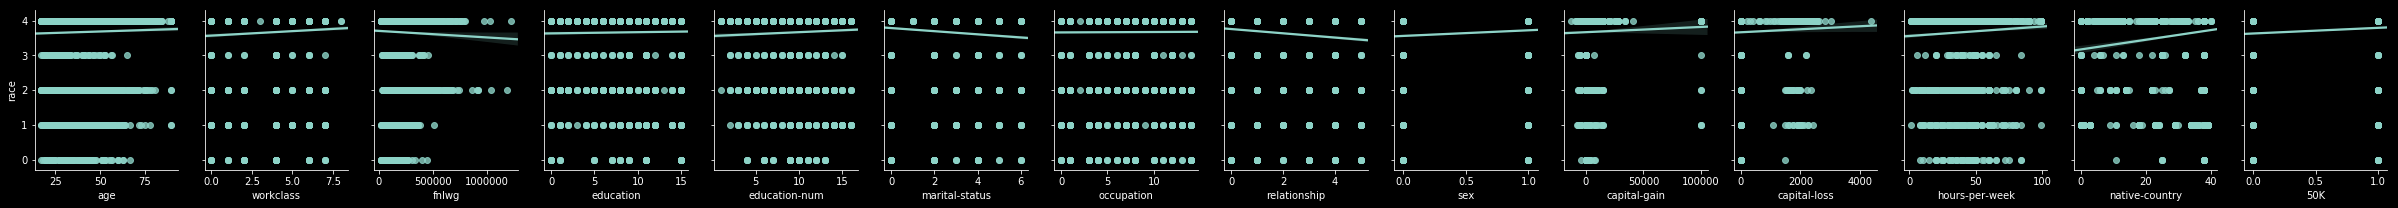

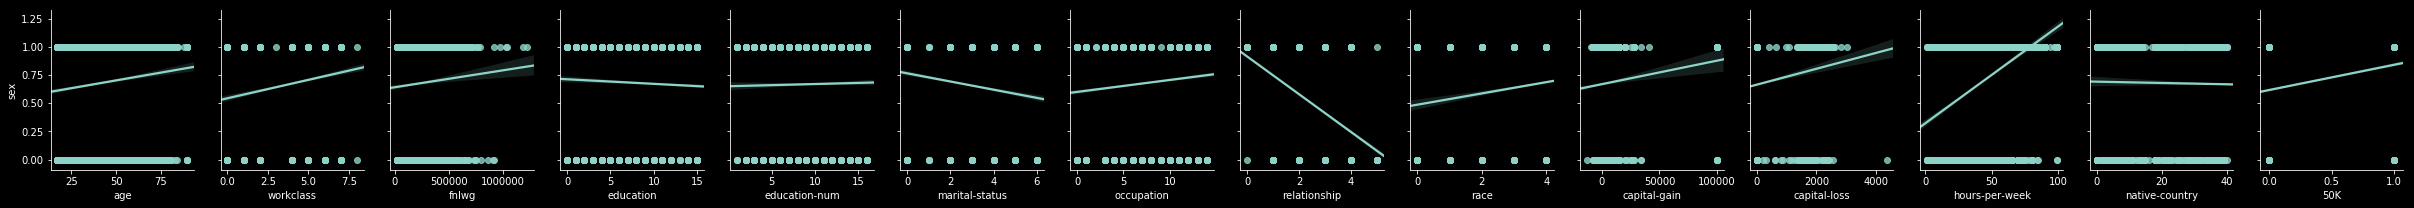

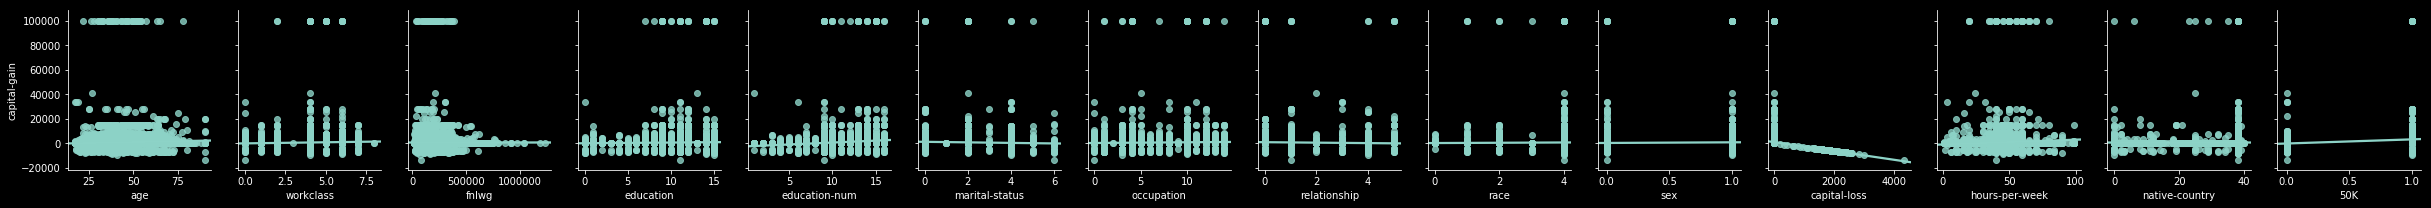

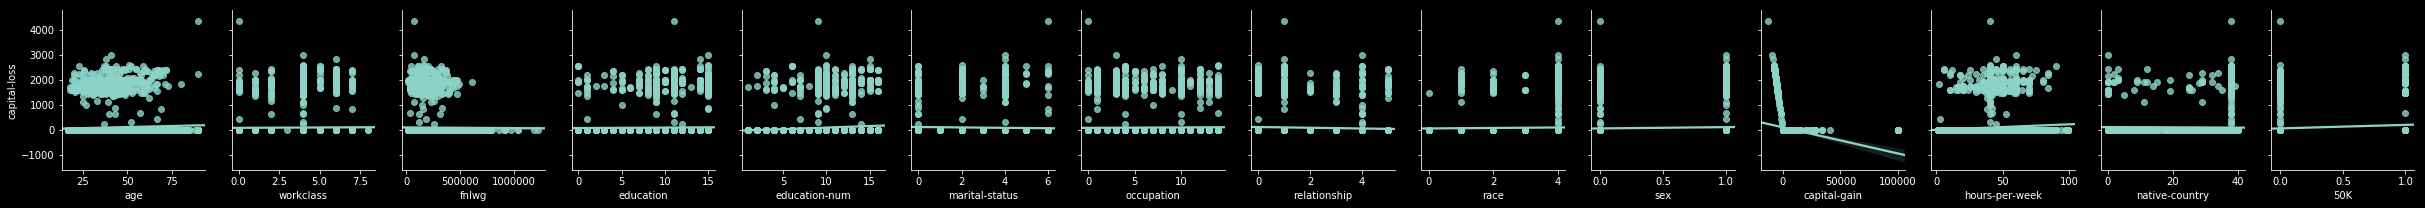

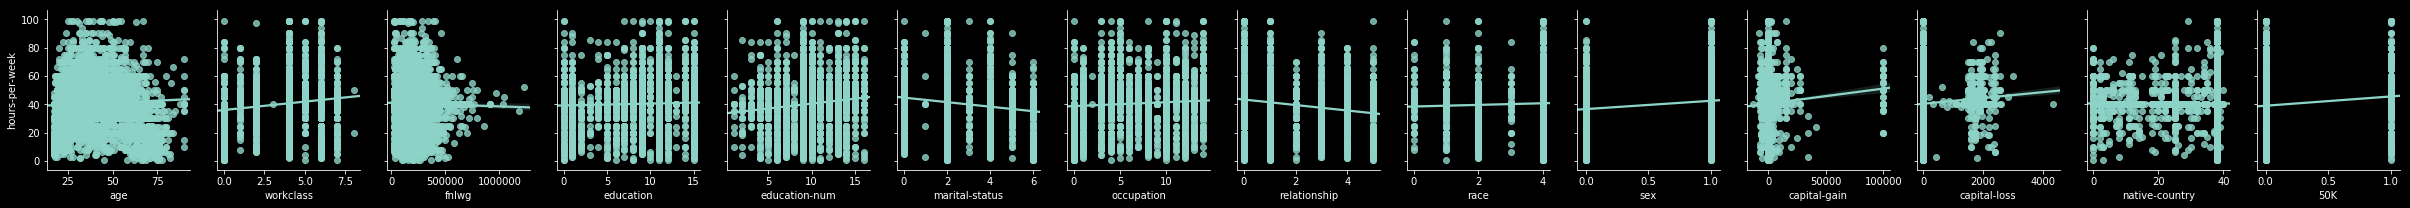

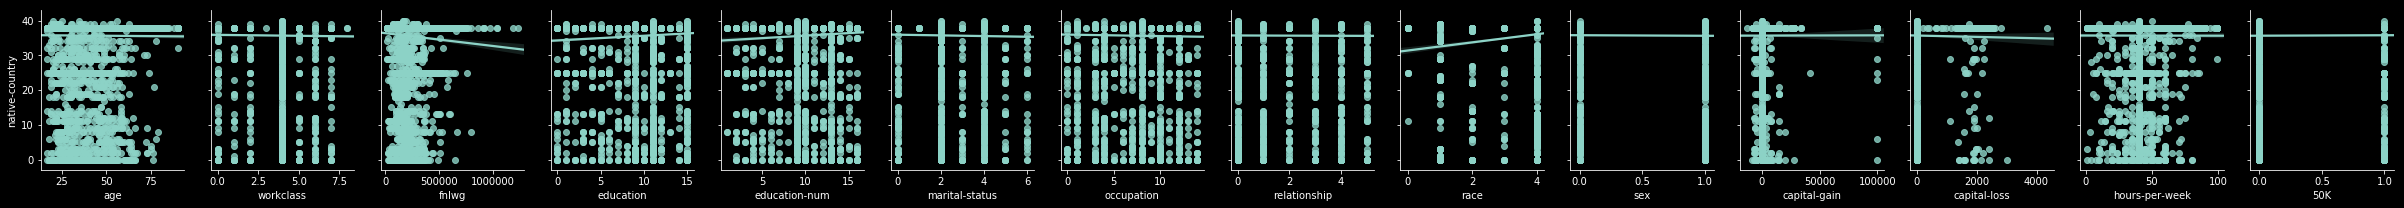

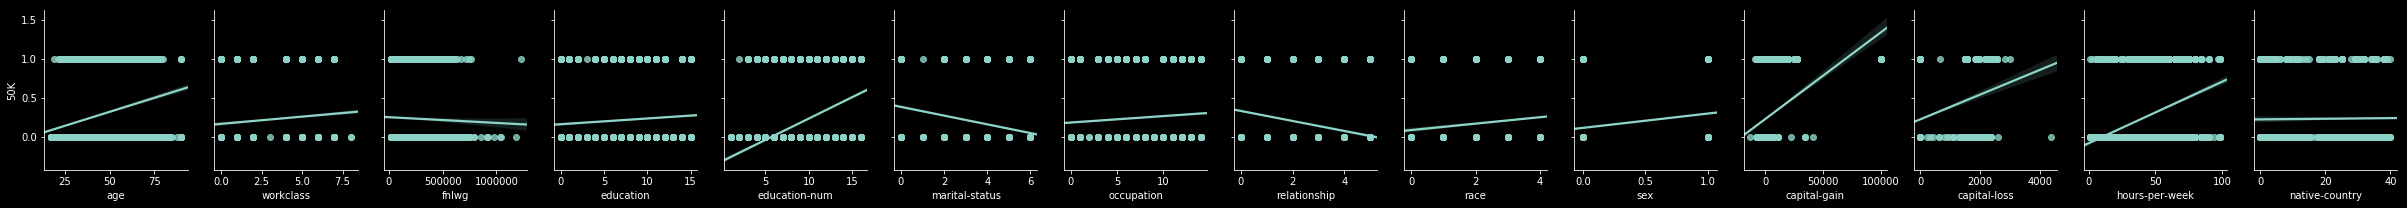

In [41]:
# # 分析各个特征向量
def featuresanaly():
    import seaborn as sns
    # visualize the relationship between the features and the response using scatterplots
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', '50K','native-country'], y_vars='hours-per-week', size=3, aspect=0.8)
    plt.show()#注意必须加上这一句，否则无法显示。
    sns.pairplot(data, x_vars=['workclass','fnlwg','education','education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='age', size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','fnlwg','education','education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='workclass',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','education','education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='fnlwg',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='education',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='education-num',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='marital-status',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num', 'marital-status', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='occupation',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num', 'marital-status',  'occupation','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='relationship',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num', 'marital-status',  'occupation', 'relationship','sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='race',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num', 'marital-status',  'occupation', 'relationship','race', 'capital-gain', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='sex',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num', 'marital-status',  'occupation', 'relationship','race', 'sex', 'capital-loss', 'hours-per-week','native-country','50K'], y_vars='capital-gain',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num', 'marital-status',  'occupation', 'relationship','race', 'sex', 'capital-gain','hours-per-week','native-country','50K'], y_vars='capital-loss', size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num', 'marital-status',  'occupation', 'relationship','race', 'sex', 'capital-gain','capital-loss','native-country','50K'], y_vars='hours-per-week', size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num', 'marital-status',  'occupation', 'relationship','race', 'sex', 'capital-gain','capital-loss','hours-per-week', '50K'], y_vars='native-country',size=3, aspect=0.8,kind='reg')
    sns.pairplot(data, x_vars=['age','workclass','fnlwg','education','education-num', 'marital-status',  'occupation', 'relationship','race', 'sex', 'capital-gain','capital-loss','hours-per-week','native-country'], y_vars='50K',size=3, aspect=0.8,kind='reg')
    plt.show()
featuresanaly()

## 预测模型

In [143]:
#聚类画图
def showclusters(loan_data0,loan_data1,loan_data2,loan_data3,loan_data4,loan_data5):

    #绘制聚类结果的散点图（2维）
    plt.rc('font', family='STXihei', size=10)
    plt.scatter(loan_data0['fnlwg'],loan_data0['hours-per-week'],50,color='#99CC01',marker='+',linewidth=2,alpha=0.8)
    plt.scatter(loan_data1['fnlwg'],loan_data1['hours-per-week'],50,color='#FE0000',marker='+',linewidth=2,alpha=0.8)
    plt.scatter(loan_data2['fnlwg'],loan_data2['hours-per-week'],50,color='#0000FE',marker='+',linewidth=2,alpha=0.8)
    # # plt.scatter(loan_data3['fnlwg'],loan_data3['age'],50,color='maroon',marker='+',linewidth=2,alpha=0.8)
    # # plt.scatter(loan_data4['fnlwg'],loan_data4['age'],50,color='black',marker='+',linewidth=2,alpha=0.8)
    # # plt.scatter(loan_data5['fnlwg'],loan_data5['age'],50,color='grey',marker='+',linewidth=2,alpha=0.8)
    #
    plt.xlabel('hours-per-week')
    plt.ylabel('age')
    plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
    plt.show()
    
# 创建3d图
from mpl_toolkits.mplot3d import Axes3D
def draw3D(loan_data0,loan_data1,loan_data2,loan_data3,loan_data4,loan_data5):

    ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程

    ax.scatter(loan_data0['marital-status'],loan_data0['fnlwg'],loan_data0['age'],color='#99CC01')
    ax.scatter(loan_data1['marital-status'],loan_data1['fnlwg'],loan_data1['age'],color='#FE0000')
    ax.scatter(loan_data2['marital-status'],loan_data2['fnlwg'],loan_data2['age'],color='#0000FE')
    ax.scatter(loan_data3['marital-status'],loan_data3['fnlwg'],loan_data3['age'],color='maroon')
    ax.scatter(loan_data4['marital-status'],loan_data4['fnlwg'],loan_data4['age'],color='black')
    ax.scatter(loan_data5['marital-status'],loan_data5['fnlwg'],loan_data5['age'],color='grey')

    ax.set_xlabel('marital-status')
    ax.set_ylabel('fnlwg')
    ax.set_zlabel('age')
    plt.show()

In [ ]:
# kmenas
def kmeans1():
# 选取个别类进行聚类
    from sklearn.cluster import KMeans
    # #设置要进行聚类的字段
    loan = np.array(data[['fnlwg','hours-per-week']])
    #设置类别为3
    knn=KMeans(n_clusters=3)
    #将数据代入到聚类模型中
    knn=knn.fit(loan)
    print(knn.cluster_centers_)
    #在原始数据表中增加聚类结果标签
    data['label']=knn.labels_
    # # 查看数据表
    # data.head()
    # #提取不同类别的数据
    loan_data0=data.loc[data["label"] == 0]
    loan_data1=data.loc[data["label"] == 1]
    loan_data2=data.loc[data["label"] == 2]
    loan_data3=data.loc[data["label"] == 3]
    loan_data4=data.loc[data["label"] == 4]
    loan_data5=data.loc[data["label"] == 5]
    showclusters(loan_data0,loan_data1,loan_data2,loan_data3,loan_data4,loan_data5)    
    draw3D(loan_data0,loan_data1,loan_data2,loan_data3,loan_data4,loan_data5)

[[9.31173706e+04 4.07758430e+01]
 [3.77947328e+05 4.02189586e+01]
 [2.05513354e+05 4.04438984e+01]]


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


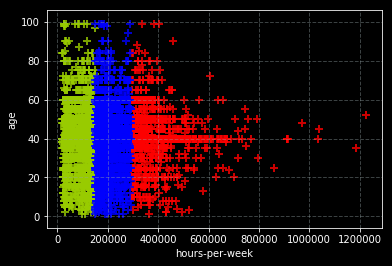

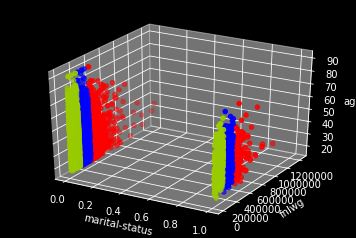

In [181]:
kmeans1()

In [182]:
# # # # PCA降维处理
from sklearn.decomposition import PCA

def pca():
    loan = np.array(data[['fnlwg','hours-per-week','marital-status','occupation','age','capital-gain','relationship','education-num']])
    dataMat=np.matrix(loan)
    pca=PCA(n_components=2)
    newData = pca.fit_transform(dataMat)
    print(newData)
pca()

[[-113163.1638718     1109.10984221]
 [-107368.0320724    -1064.54082904]
 [  24966.96772307   -1056.5134162 ]
 ...
 [ 128483.9676774    -1050.2375556 ]
 [ -63936.03212367   -1061.90374083]
 [ 110888.96755117   -1051.30245082]]


In [197]:
# kmeans开始聚类

loan = data[
['fnlwg', 'hours-per-week', 'marital-status', 'occupation', 'age', 'capital-gain', 'relationship', 'education-num']]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
def kmeans():
    from sklearn.cluster import KMeans
    data_zs = 1.0 * (loan - loan.mean()) / loan.std()  # 数据标准化
    model = KMeans(n_clusters=4,n_jobs = 4,random_state=0)
    model.fit(data_zs)
    # # labels为分类的标签
    labels = model.labels_
    # ##聚类中心
    cluster_centers = model.cluster_centers_
    n_clusters = len(np.unique(labels))
    # print(model.cluster_centers_)
    # # 把标签加入到矩阵中用DataFrame生成新的df，index为类别的编号，这里是0,1,2
    # # dataDf = pd.DataFrame(data_zs,index=labels,columns=['X','Y'])
    # # print(pca.explained_variance_ratio_)#返回各个成分各自的方差百分比（贡献率)
    # # # 简单打印结果
    # # # r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
    # # # r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
    # # # r = pd.concat([r2, r1], axis = 1) #横向连接(0是纵向), 得到聚类中心对应的类别下的数目
    # # # r.columns = list(data_zs.columns) + [u'类别数目'] #重命名表头
    # # # print(r)

    # # #详细打印结果
    # 输出原始数据及其类别
    r = pd.concat([data_zs, pd.Series(model.labels_, index=data_zs.index)], axis=1)  # 详细
    # # # 输出每个样本对应的类别
    r.columns = list(data_zs.columns) + [u'聚类类别']  # 重命名表头
    # # # r.to_excel(outputfile) #保存结果
    # # # print(r)
    return r,labels

In [ ]:
r,labels=kmeans()

In [186]:
# 确定聚类个数
def nclusters():
    from scipy.spatial.distance import cdist
    K = range(1, 20)
    meandistortions = []
    for k in K:
      kmn = KMeans(n_clusters=k)
      kmn.fit(data_zs)
      meandistortions.append(sum(np.min(cdist(data_zs, kmn.cluster_centers_, 'euclidean'), axis=1)) / data_zs.shape[0])
    plt.plot(K, meandistortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('averagechange')
    plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


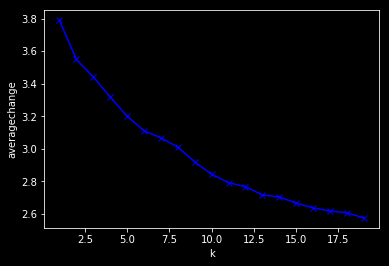

In [187]:
nclusters()

In [188]:
# # # # Calinski-Harabasz(CH)指标评价聚类,CH越大代表着类自身越紧密，类与类之间越分散，即更优的聚类结果
def CH(model):
    from sklearn import metrics
    y_pred=model.predict(data_zs)
    print(metrics.calinski_harabaz_score(data_zs, y_pred))

In [189]:
def density_plot(loan):  # 自定义作图函数
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    p = loan.plot(kind='kde', linewidth=2, subplots=True, sharex=False)
    [p[i].set_ylabel(u'密度') for i in range(6)]
    plt.legend()
    return plt
    # 输出文件
#     pic_output = 'D:\BaiduYunDownload\Python数据分析与挖掘实战代码\chapter5\demo\pd_'  # 概率密度图文件名前缀
#     for i in range(4):
#         density_plot(loan[r[u'聚类类别'] == i]).savefig(u'%s%s.png' % (pic_output, i))

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


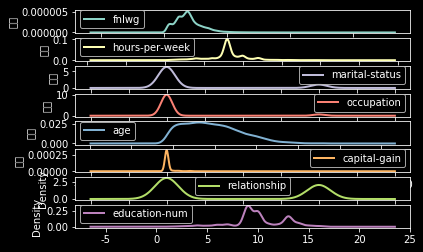

In [190]:
density_plot(loan)

In [154]:
# TSNE降维显示聚类结果
def tsne(r,u):
    from sklearn.manifold import TSNE
    tsne = TSNE()
    tsne.fit_transform(data_zs)  # 进行数据降维
    tsne = pd.DataFrame(tsne.embedding_, index=data_zs.index)  # 转换数据格式
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    # 不同类别用不同颜色和样式绘图
    d = tsne[r[u'聚类类别'] == 0]
    plt.plot(d[0], d[1], 'r.')
    d = tsne[r[u'聚类类别'] == 1]
    plt.plot(d[0], d[1], 'go')
    d = tsne[r[u'聚类类别'] == 2]
    plt.plot(d[0], d[1], 'b*')
    plt.show()

In [277]:
# # # PCA降维
def pca(r,u):
    pca = PCA(n_components=2)
    newdata = pd.DataFrame(pca.fit_transform(data_zs))
    print(newdata)
    plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

    # 不同类别用不同颜色和样式绘图
    d = newdata[r[u'聚类类别'] == 0]
    plt.plot(d[0], d[1], 'r.')
    d = newdata[r[u'聚类类别'] == 1]
    plt.plot(d[0], d[1], 'bo')
    d = newdata[r[u'聚类类别'] == 2]
    plt.plot(d[0], d[1], 'g>')
    d = newdata[r[u'聚类类别'] == 3]
    plt.plot(d[0], d[1], 'y<')
    d = newdata[r[u'聚类类别'] == 4]
    plt.plot(d[0], d[1], 'yo')
    # d = newdata[r[u'聚类类别'] == 5]
    # plt.plot(d[0], d[1], 'b*')
    plt.show()


def pcashow(data):
    pca = PCA(n_components=2)    #降到2维
    pcadata = pd.DataFrame(pca.fit_transform(data))
    # 打印结果,详细输出原始数据及其类别
    r = pd.concat([data, pd.Series(labels, index=data.index)], axis=1)  # 详细
    #输出每个样本对应的类别
    r.columns = list(data.columns) + [u'聚类类别']  # 重命名表头
    # # 不同类别用不同颜色和样式绘图
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    for k, col in zip(range(n_clusters), colors):
        d = pcadata[r[u'聚类类别']==k]
        plt.plot(d[0], d[1],'o',markerfacecolor=col,markeredgecolor='k',)
    plt.title('Estimated number of clusters: %d' % n_clusters)
    plt.show()
# pcashow(data)

In [192]:
# # # pca的具体操作
from sklearn.decomposition import PCA

# loan = np.array(data[['hours-per-week','fnlwg','age']])

pca=PCA()
data=np.matrix(data)
pca.fit(data)
# print(pca.components_)  #返回模型的各个特征向量
# print(pca.explained_variance_ratio_)#返回各个成分各自的方差百分比（贡献率)
meanValue = np.mean(data, axis=0)
# # 去中心，元数据减去均值，值得新的矩阵均值为0
dataRemMat = data - meanValue
# # # 求矩阵的协方差矩阵
covMat = np.cov(dataRemMat, rowvar=0)
# # # print ("-------covMatt------")
# # # print (covMat)
# # # 求特征值和特徵向量
feaValue, feaVect = np.linalg.eig(np.mat(covMat))
# print ("-------特征值-------")
# print (feaValue)

from sklearn import datasets,decomposition,manifold
# pca=decomposition.PCA(n_components=None)
# pca.fit(data)
# print("explained variance ratio:%s"%str(pca.explained_variance_ratio_))

# # # print ("-------特征向量-------")
# # # print (feaVect)
# # # 返回从小到大的索引值print "feaSort" + str(feaValueSort)
feaValueSort = np.argsort(feaValue)
feaValueTopN = feaValueSort[:-(2 + 1):-1]
redEigVects = feaVect[:, feaValueTopN]  # 选择之后的特征向量矩阵
# print (redEigVects)
#
# n_eigValIndice = feaValueSort[-1:-(2 + 1):-1]  # 最大的n个特征值的下标
# print(n_eigValIndice)
# n_eigVect = feaVect[:, n_eigValIndice]  # 最大的n个特征值对应的特征向量
# # print(n_eigVect)
# # # # print ("--------TopN特征向量矩阵--------")
# # print (redEigVects)
# # print (np.shape(redEigVects))
lowDataMat = dataRemMat * redEigVects  # 数据矩阵*特征向量矩阵 得到降维后的矩阵
reconMat = lowDataMat * redEigVects.T + meanValue #这一步做数据恢复，并没有看懂这么做的意义
print (lowDataMat)

[[-113163.16142184    1109.26790232]
 [-107368.02962495   -1064.37969119]
 [  24966.97012401   -1056.35869297]
 ...
 [ 128483.97002781   -1050.08779657]
 [ -63936.02968236   -1061.74483831]
 [ 110888.96990822   -1051.151839  ]]


In [220]:
# # MeanShift算法
# # #
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle  ##python自带的迭代器模块
# # # #
# # # #
loan = data[['fnlwg','hours-per-week','marital-status','occupation','age','capital-gain','relationship','education-num']]
data_zs = 1.0 * (loan - loan.mean()) / loan.std()  # 数据标准化
# ##带宽，也就是以某个点为核心时的搜索半径
bandwidth = estimate_bandwidth(data_zs, quantile=0.3, n_samples=None,random_state=0,n_jobs=1)
# # # # ##设置均值偏移函数
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data_zs)
# 标签分类
labels = ms.labels_
cluster_centers = ms.cluster_centers_
# print("labels: ", labels)
n_clusters_ = len(np.unique(labels))
print(n_clusters_)

7


In [221]:
# # Calinski-Harabasz(CH)指标评价聚类,CH越大代表着类自身越紧密，类与类之间越分散，即更优的聚类结果，CH值越大越好
from sklearn import metrics
y_pred=ms.predict(data_zs)
print(metrics.calinski_harabaz_score(data_zs, y_pred))

554.3367305945549


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


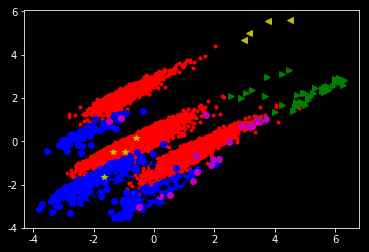

In [226]:

# # # # # 打印结果
# # # #详细输出原始数据及其类别
r = pd.concat([data_zs, pd.Series(ms.labels_, index = data_zs.index)], axis = 1)  #详细
# # # # # 输出每个样本对应的类别
r.columns = list(data_zs.columns) + [u'聚类类别'] #重命名表头
# # # print(r)

# # # PCA降维显示
pca = PCA(n_components=2)
pcadata = pd.DataFrame(pca.fit_transform(data_zs))

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
#
# 不同类别用不同颜色和样式绘图
d = pcadata[r[u'聚类类别'] == 0]
plt.plot(d[0], d[1], 'r.')
d = pcadata[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'bo')
d = pcadata[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'g>')
d = pcadata[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], 'y<')
d = pcadata[r[u'聚类类别'] == 4]
plt.plot(d[0], d[1], 'mo')
d = pcadata[r[u'聚类类别'] == 5]
plt.plot(d[0], d[1], 'k*')
d = pcadata[r[u'聚类类别'] == 6]
plt.plot(d[0], d[1], 'y*')
plt.show()

In [262]:
loan.loc[1][0]

83311.0

In [265]:
# ##绘图（参考，包装函数画图）
plt.figure(1)
plt.clf()
# plt.show()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
#     ##根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = labels == k
    cluster_center = cluster_centers[k]
#     ##X[my_members, 0] 取出my_members对应位置为True的值的横坐标
    centroids = ms.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.plot(loan[my_members, 0], loan[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

3


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


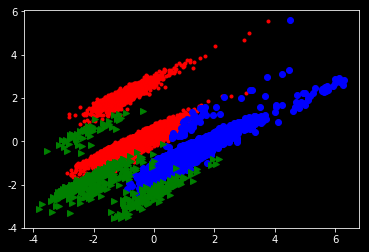

In [276]:
# # Spectral Clustering算法函数？？？？

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import spectral_clustering
from sklearn import metrics
from itertools import cycle  ##python自带的迭代器模块
#
loan = data[['fnlwg','hours-per-week','marital-status','occupation','age','capital-gain','relationship','education-num']]
data_zs = 1.0 * (loan - loan.mean()) / loan.std()  # 数据标准化

# ##变换成矩阵，输入必须是对称矩阵
metrics_metrix = (-1 * metrics.pairwise.pairwise_distances(loan)).astype(np.int32)
metrics_metrix += -1 * metrics_metrix.min()
# ##设置谱聚类函数
n_clusters_ = 4
lables = spectral_clustering(metrics_metrix, n_clusters=n_clusters_)
metrics.calinski_harabaz_score(data_zs,lables)

n_clusters_ = len(np.unique(labels))
print(n_clusters_)
# ##绘图
# plt.figure(1)
# plt.clf()
# colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# for k, col in zip(range(n_clusters_), colors):
#     ##根据lables中的值是否等于k，重新组成一个True、False的数组
#     my_members = lables == k
#     ##X[my_members, 0] 取出my_members对应位置为True的值的横坐标
#     plt.plot(data_zs[my_members, 0], data_zs[my_members, 1], col + '.')

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

# # # PCA降维显示
pca = PCA(n_components=n_clusters_)
pcadata = pd.DataFrame(pca.fit_transform(data_zs))

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
#
# 不同类别用不同颜色和样式绘图
d = pcadata[r[u'聚类类别'] == 0]
plt.plot(d[0], d[1], 'r.')
d = pcadata[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'bo')
d = pcadata[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'g>')
d = pcadata[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], 'y<')
d = pcadata[r[u'聚类类别'] == 4]
plt.plot(d[0], d[1], 'mo')
d = pcadata[r[u'聚类类别'] == 5]
plt.plot(d[0], d[1], 'k*')
d = pcadata[r[u'聚类类别'] == 6]
plt.plot(d[0], d[1], 'y*')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


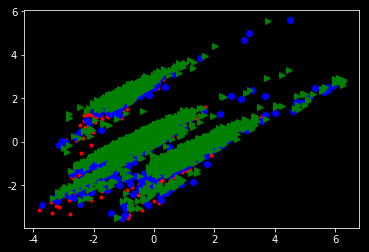

In [274]:
# # Hierarchical Clustering算法？？？
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AgglomerativeClustering
from itertools import cycle  ##python自带的迭代器模块
# #
# loan = np.array(data[['hours-per-week','workclass','education']])
# #
loan = data[['fnlwg','hours-per-week','marital-status','occupation','age','capital-gain','relationship','education-num']]
data_zs = 1.0 * (loan - loan.mean()) / loan.std()  # 数据标准化
# # ##设置分层聚类函数
linkages = ['ward', 'average', 'complete']
n_clusters_ = 3
ac = AgglomerativeClustering(linkage=linkages[2], n_clusters=n_clusters_)
# # ##训练数据
ac.fit(data_zs)
# # ##每个数据的分类
lables = ac.labels_
# # ##绘图
# # # PCA降维显示
pca = PCA(n_components=n_clusters_)
pcadata = pd.DataFrame(pca.fit_transform(data_zs))

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
#
# 不同类别用不同颜色和样式绘图
d = pcadata[r[u'聚类类别'] == 0]
plt.plot(d[0], d[1], 'r.')
d = pcadata[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'bo')
d = pcadata[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'g>')
plt.show()

labels:  [2 2 3 ... 1 2 1]
       fnlwg  hours-per-week  marital-status  occupation  age  capital-gain  relationship  education-num  聚类类别
0      77516              40             0.0         0.0   39          2174           0.0             13     2
1      83311              13             0.0         0.0   50             0           1.0             13     2
2     215646              40             1.0         0.0   38             0           0.0              9     3
3     234721              40             0.0         0.0   53             0           1.0              7     1
4     338409              40             0.0         0.0   28             0           0.0             13     0
5     284582              40             0.0         0.0   37             0           0.0             14     1
6     160187              16             0.0         0.0   49             0           0.0              5     3
7     209642              45             0.0         0.0   52             0          

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


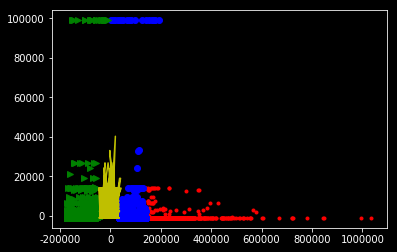

In [273]:
# # Birch算法
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]
# loan = np.array(data[['hours-per-week','workclass','education']])

loan = data[['fnlwg','hours-per-week','marital-status','occupation','age','capital-gain','relationship','education-num']]
data_zs = 1.0 * (loan - loan.mean()) / loan.std()  # 数据标准化

##设置birch函数
b = Birch(n_clusters = 4)
# birch = Birch(n_clusters = None)
birch=b.fit(loan)
#训练数据
# y_pred = birch.fit_predict(loan)
##绘图
# plt.scatter(loan[:, 0], loan[:, 1], c=y_pred)
# plt.show()

labels = birch.labels_
# cluster_centers = birch.cluster_centers_
print("labels: ", labels)
n_clusters_ = len(np.unique(labels))
# print(n_clusters_)
# ##聚类中心
#
# # # 打印结果

# # #详细输出原始数据及其类别
r = pd.concat([loan, pd.Series(birch.labels_, index = loan.index)], axis = 1)  #详细
# # # 输出每个样本对应的类别
r.columns = list(loan.columns) + [u'聚类类别'] #重命名表头
print(r)

# PCA降维
pca = PCA(n_components=2)
pcadata = pd.DataFrame(pca.fit_transform(loan))
# 不同类别用不同颜色和样式绘图
d = pcadata[r[u'聚类类别'] == 0]
plt.plot(d[0], d[1], 'r.')
d = pcadata[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'bo')
d = pcadata[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'g>')
d = pcadata[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], 'y')

plt.show()

3
1945.6908941782328


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


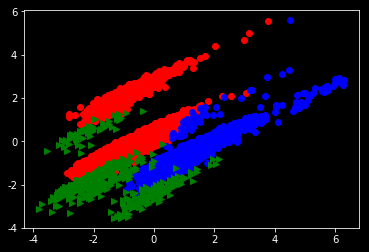

In [275]:
# # # mimi birch kmeans（注意：抽样计算，每次的值都不一样）
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

loan = data[['fnlwg','hours-per-week','marital-status','occupation','age','capital-gain','relationship','education-num']]
data_zs = 1.0 * (loan - loan.mean()) / loan.std()  # 数据标准化

# 确定聚类数目n
# from scipy.spatial.distance import cdist
# K = range(1, 20)
# meandistortions = []
# for k in K:
#     mbk = MiniBatchKMeans(n_clusters=k)
#     mbk.fit(data_zs)
#     meandistortions.append(sum(np.min(cdist(data_zs, mbk.cluster_centers_, 'euclidean'), axis=1)) / data_zs.shape[0])
# plt.plot(K, meandistortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('averagechange')
# plt.show()

# 确定n的个数，开始聚类，这里n=3
mbk=MiniBatchKMeans(n_clusters=3)
model=mbk.fit(data_zs)
# # # # # # 训练数据
labels = model.labels_
# print("labels: ", labels)
# cluster_centers = mbk.cluster_centers_
n_clusters_ = len(np.unique(labels))
print(n_clusters_)
# # # # # #详细输出原始数据及其类别
r = pd.concat([data_zs, pd.Series(model.labels_, index = data_zs.index)], axis = 1)  #详细
# # # # # # 输出每个样本对应的类别
r.columns = list(data_zs.columns) + [u'聚类类别'] #重命名表头
# # # print(r)

# # # Calinski-Harabasz(CH)指标评价聚类,CH越大代表着类自身越紧密，类与类之间越分散，即更优的聚类结果
y_pred = model.fit_predict(data_zs)
print(metrics.calinski_harabaz_score(data_zs, y_pred))


# PCA降维可视化
pca = PCA(n_components=2)
pcadata = pd.DataFrame(pca.fit_transform(data_zs))
# # 不同类别用不同颜色和样式绘图
d = pcadata[r[u'聚类类别'] == 0]
plt.plot(d[0], d[1], 'ro')
d = pcadata[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'bo')
d = pcadata[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'g>')
d = pcadata[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], 'y*')
d = pcadata[r[u'聚类类别'] == 4]
plt.plot(d[0], d[1], 'mo')
d = pcadata[r[u'聚类类别'] == 5]
plt.plot(d[0], d[1], 'k*')
d = pcadata[r[u'聚类类别'] == 6]
plt.plot(d[0], d[1], 'g*')
d = pcadata[r[u'聚类类别'] == 7]
plt.plot(d[0], d[1], 'y>')
#
plt.show()
